In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import keras 
from keras.models import Sequential , Model , model_from_json
from keras.layers import Dense , Conv2D , Activation , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.layers.pooling import AveragePooling2D
from keras.utils import np_utils
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint


In [2]:
testData=pd.read_csv("/content/drive/MyDrive/EmotionRecognition/Data/train.csv")
trData=pd.read_csv("/content/drive/MyDrive/EmotionRecognition/Data/train.csv")
k=0
while(k<24499):
   testData=testData.drop(k)
   k=k+1
   a=28706-k
   if(a>24500):
     trData=trData.drop(a)

In [ ]:
testData

,emotion,pixels
24499,3,24 24 25 24 26 25 32 159 219 219 227 205 198 1...
24500,4,53 62 79 114 148 192 200 187 199 222 225 213 2...
24501,0,120 120 120 123 125 148 142 103 72 84 74 50 44...
24502,5,124 66 82 65 122 74 46 93 99 65 51 51 29 39 30...
24503,3,177 175 172 176 129 60 60 50 32 30 39 59 85 11...
...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


In [3]:
train_pixels=trData.pixels.str.split(" ").tolist()
train_pixels=pd.DataFrame(train_pixels,dtype=int)

train_images = train_pixels.values
train_images = train_images.astype(np.float)
print(train_images)
print(train_images.shape)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or

[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 74.  81.  87. ... 188. 187. 187.]
 [222. 227. 203. ... 136. 136. 134.]
 [195. 199. 205. ...   6.  15.  38.]]
(24504, 2304)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [4]:
def show (img):
  show_image=img.reshape(48,48)
  plt.axis('off')
  plt.imshow(show_image,cmap='gray')

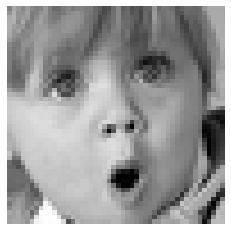

In [ ]:
show(train_images[2878])

In [5]:
train_labels_flat=trData["emotion"].values.ravel()
train_labels_count=np.unique(train_labels_flat).shape[0]
print("Number of different facial expressions: %d"%train_labels_count)

Number of different facial expressions: 7


In [6]:
def dense_to_one_hot(labels_dense, num_classes): 
  num_labels=labels_dense.shape[0]
  index_offset=np.arange(num_labels)*num_classes
  labels_one_hot= np.zeros((num_labels,num_classes))
  labels_one_hot.flat[index_offset+labels_dense.ravel()]=1
  return labels_one_hot

In [7]:
y_train= dense_to_one_hot(train_labels_flat,train_labels_count)
y_train=y_train.astype(np.uint8)
print(y_train.shape)

(24504, 7)


In [8]:
test_pixels=testData.pixels.str.split(" ").tolist()
test_pixels=pd.DataFrame(test_pixels,dtype=int)
test_images=test_pixels.values
test_images=test_images.astype(np.float)
print(test_images.shape)

(4210, 2304)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


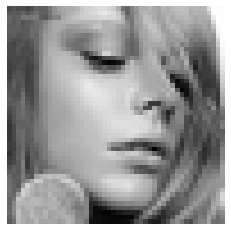

In [ ]:
show(test_images[2040])

In [9]:
test_labels_flat = testData["emotion"].values.ravel()
test_labels_count= np.unique(test_labels_flat).shape[0]

y_test=dense_to_one_hot(test_labels_flat, test_labels_count)
y_test=y_test.astype(np.uint8)

print(y_test.shape)



(4210, 7)


<function matplotlib.pyplot.show(*args, **kw)>

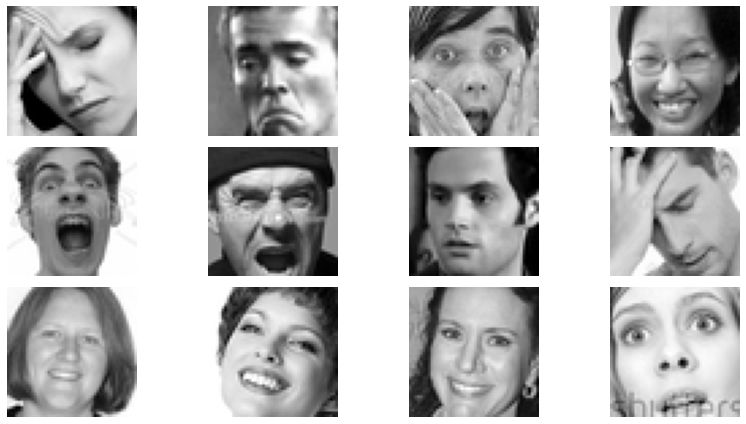

In [ ]:
plt.figure(0,figsize=(12,6))
for i in range (1,13):
  plt.subplot(3,4,i)
  plt.axis('off')
  image=test_images[i].reshape(48,48)
  plt.imshow(image,cmap="gray")
plt.tight_layout()
plt.show

In [18]:
model= Sequential()
# 1.
model.add(Conv2D(64,3,data_format="channels_last",kernel_initializer="he_normal",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

#2.
model.add(Conv2D(64,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.6))

#3
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))


#4
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))

#5
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.6))


#full link layer
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("swish"))
model.add(Dropout(0.6))

#output layer

model.add(Dense(7))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 46, 46, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 batch_normalization_7 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 44, 44, 64)       

In [13]:
x_train= train_images.reshape(-1,48,48,1)
x_test=test_images.reshape(-1,48,48,1)
print(x_train.shape)
#print(y_test.shape)

(24504, 48, 48, 1)


In [19]:
checkpointer=ModelCheckpoint(filepath='/content/drive/MyDrive/data.csv/face_model_a2.h5',verbose=1,save_best_only=True)
epochs=29
batchsize=199

hist=model.fit(x_train, y_train,epochs=epochs,shuffle=True,batch_size=batchsize,validation_data=(x_test,y_test),callbacks=[checkpointer],verbose=2)

# save model
model_json=model.to_json()
with open("/content/drive/MyDrive/data.csv/face_model_a2.json","w") as json_file:
  json_file.write(model_json)



Epoch 1/29

Epoch 1: val_loss improved from inf to 2.39994, saving model to /content/drive/MyDrive/data.csv/face_model_a2.h5
124/124 - 8s - loss: 2.0459 - accuracy: 0.2171 - val_loss: 2.3999 - val_accuracy: 0.1876 - 8s/epoch - 69ms/step
Epoch 2/29

Epoch 2: val_loss improved from 2.39994 to 1.61301, saving model to /content/drive/MyDrive/data.csv/face_model_a2.h5
124/124 - 7s - loss: 1.7608 - accuracy: 0.2971 - val_loss: 1.6130 - val_accuracy: 0.3724 - 7s/epoch - 57ms/step
Epoch 3/29

Epoch 3: val_loss improved from 1.61301 to 1.52203, saving model to /content/drive/MyDrive/data.csv/face_model_a2.h5
124/124 - 7s - loss: 1.6472 - accuracy: 0.3532 - val_loss: 1.5220 - val_accuracy: 0.4128 - 7s/epoch - 56ms/step
Epoch 4/29

Epoch 4: val_loss improved from 1.52203 to 1.52042, saving model to /content/drive/MyDrive/data.csv/face_model_a2.h5
124/124 - 8s - loss: 1.5530 - accuracy: 0.4013 - val_loss: 1.5204 - val_accuracy: 0.4107 - 8s/epoch - 62ms/step
Epoch 5/29

Epoch 5: val_loss improved f

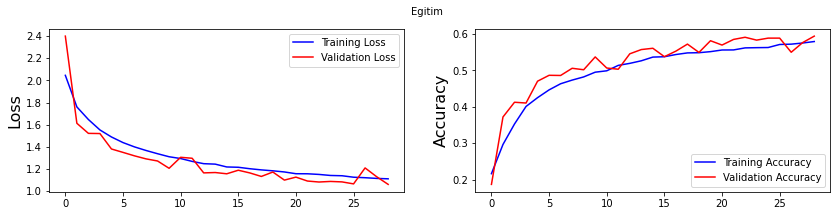

In [20]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)

plt.ylabel('Loss',fontsize=16)
plt.plot(hist.history['loss'], color='b',label='Training Loss')
plt.plot(hist.history['val_loss'], color='r',label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy',fontsize=16)
plt.plot(hist.history['accuracy'] , color='b',label='Training Accuracy')
plt.plot(hist.history['val_accuracy'],color='r',label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()
